In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.neural_network import MLPClassifier
import pandas as pd

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image,  cmap='gray', **options)
    plt.axis("off")

## Classifying images
One important task in ML is classifying images:
* classifying an image of a road sign into: "stop", "speed limit 50", etc.
* classifying an image of a number into the corresponding digit.

In [4]:
#Load the data and split it into train and test sets
(X_train,y_train), (X_test, y_test) = mnist.load_data()
#Get the image shape
print(X_train.shape)
print(X_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


Notice the X_train contains 60,000 rows of 28 x 28 pixel images. 
The X_test contains 10,000 rows of 28 x 28 pixel images.

### Each row is a 28 x 28 pixel image

4


(<matplotlib.image.AxesImage at 0x7f539dbb5908>, None)

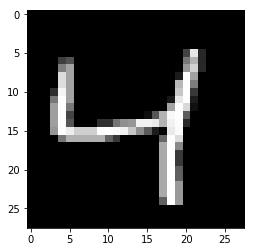

In [22]:
row = 2
plt.imshow(X_train[row,:,:],cmap='gray'),print(y_train[row])

True value=
 [[5 0 4 1 9 2 1 3 1]
 [4 3 5 3 6 1 7 2 8]
 [6 9 4 0 9 1 1 2 4]]


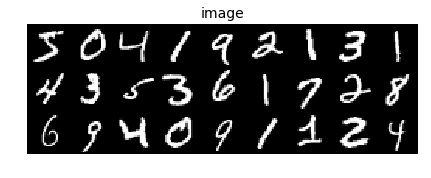

In [47]:
plt.figure(figsize=(7,7))
# Plotting 'original' image
plot_digits(X_train[0:27,:],images_per_row=9)
plt.title("image", fontsize=14)
print("True value=\n",y_train[0:27].reshape(-1,9))

### What is an image ?
This shows the image as a series of pixel values, that is it is a matrix of integer numbers between 0 (black)
and 255 (white). This is true for grayscale images.

In [12]:
X_train[row,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [20]:
df=pd.DataFrame(X_train[row,:,:])
df=df.style.background_gradient(cmap='gray')
display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,232,39,0,0,0,0,0
6,0,0,0,0,62,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,180,39,0,0,0,0,0
7,0,0,0,0,126,163,0,0,0,0,0,0,0,0,0,0,0,0,0,2,153,210,40,0,0,0,0,0
8,0,0,0,0,220,163,0,0,0,0,0,0,0,0,0,0,0,0,0,27,254,162,0,0,0,0,0,0
9,0,0,0,0,222,163,0,0,0,0,0,0,0,0,0,0,0,0,0,183,254,125,0,0,0,0,0,0


## Converting a set of images into a table
We convert each image (a $28\times 28$ matrix) into a **row** vector, whose dimension is $1 \times 724$.

In [28]:
X_train_r = X_train.reshape(X_train.shape[0],28*28)
X_test_r  =  X_test.reshape(X_test.shape[0],28*28)

In [37]:
datav =np.hstack([X_train_r, y_train.reshape(-1,1)])
df=pd.DataFrame(datav[0:7,:])
df=df.style.background_gradient(cmap='gray')
display(df)

## Scaling
We then scale the resulting matrix to the interval $[0,1]$, so we can now apply
* logistic regression
* multi-layer perceptron 
 (without having numerical problems

In [49]:
X_train_r = X_train_r/255
X_test_r = X_test_r/255

## Logistic Regression
We can now apply logistic regression with the option
* multi_class='multinomial'

to account that the class is not binary (all digits: 0,1,2,3,4,5,6,7,8,9)

In [141]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial',solver='lbfgs',  fit_intercept=True, max_iter=100)
clf.fit(X_train_r,y_train)
y_pred = clf.predict(X_test_r)

/home/benavoli/anaconda3/envs/mypy/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Questions:
* the accuracy of the classifier
* compute the confusion matrix of the predictions versus the true classes (see [link](https://www.python-course.eu/confusion_matrix.php) about what a confusion matrix is and [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) how to compute and plot it).
* visualise (using the plot function provided at the beginning of the notebook) instances (images) where the predicted class was wrong. What can you notice?